In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [99]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import keras
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.backend import clear_session

import matplotlib.pyplot as plt    

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.layers import BatchNormalization

In [100]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size=0.1,
                                                      random_state=40)

# Print shape of each set
print("Shape of training set:", x_train.shape)
print("Shape of validation set:", x_valid.shape)
print("Shape of test set:", x_test.shape)


Shape of training set: (45000, 32, 32, 3)
Shape of validation set: (5000, 32, 32, 3)
Shape of test set: (10000, 32, 32, 3)


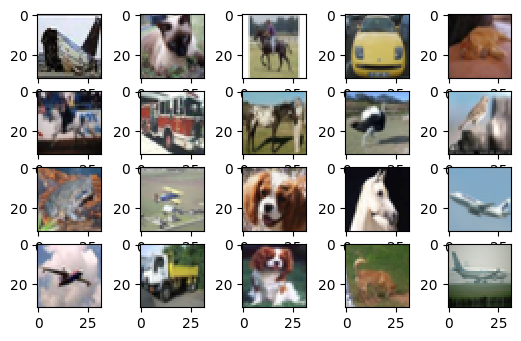

In [101]:
import matplotlib.pyplot as plt

for i in range(20):
    #define subplot
    plt.subplot(5, 5, i+1)
    #plot pixel data
    plt.imshow(x_train[i], cmap=plt.cm.binary)
#diplay the images
plt.show()

In [102]:
import keras
from keras.utils import to_categorical

#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train_ = keras.utils.to_categorical(y_train, num_category)
y_test_ = keras.utils.to_categorical(y_test, num_category)
y_valid_ = keras.utils.to_categorical(y_valid, num_category)

In [103]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
x_test=x_test/255.0
x_train=x_train/255.0
x_valid=x_valid/255.0

In [104]:
# create model
model = Sequential()

model.add(BatchNormalization())

#16 is filters
model.add(Conv2D(32, input_shape = (32, 32, 3),
                 kernel_size = (3, 3),
                 kernel_initializer = "normal", 
                 padding = 'same',
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Conv2D(64, 
                 kernel_size = (3, 3),
                 kernel_initializer = "normal",
                 padding = 'same',
                 activation = 'relu'))       

model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Conv2D(128, 
                kernel_size = (3, 3),
                padding = "same",
                kernel_initializer = "normal",
                activation = "relu"))    

model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Dropout(0.25))

model.add(Conv2D(256, 
                kernel_size = (3, 3),
                padding = "same",
                kernel_initializer = "normal",
                activation = "relu"))    

model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Dropout(0.25))

model.add(Conv2D(512, 
                kernel_size = (3, 3),
                padding = "same",
                kernel_initializer = "normal",
                activation = "relu"))    


model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
num_fold = 1

qtd_fods = 2

caminho_salvar_modelo = "models/"

In [106]:
monitor = EarlyStopping(monitor = "val_loss", min_delta = 1e-1, patience = 5, verbose = 1, mode  ="auto")

folds  = KFold(n_splits = qtd_fods, shuffle = True, random_state = 1).split(x_train, y_train)

argumentation = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True, 
                                   fill_mode="nearest")

In [107]:
# train model
Score = model.fit(x_train, y_train_, epochs=64, batch_size=256, verbose=1,
                  validation_data=(x_test, y_test_))

Epoch 1/64
176/176 [==============================] - 9s 26ms/step - loss: 2.0929 - accuracy: 0.2431 - val_loss: 2.8738 - val_accuracy: 0.1000
Epoch 2/64
176/176 [==============================] - 4s 22ms/step - loss: 1.5892 - accuracy: 0.4203 - val_loss: 3.5687 - val_accuracy: 0.1481
Epoch 3/64
176/176 [==============================] - 4s 23ms/step - loss: 1.4180 - accuracy: 0.4908 - val_loss: 1.5000 - val_accuracy: 0.4603
Epoch 4/64
176/176 [==============================] - 4s 23ms/step - loss: 1.2888 - accuracy: 0.5429 - val_loss: 1.2827 - val_accuracy: 0.5305
Epoch 5/64
176/176 [==============================] - 4s 22ms/step - loss: 1.1962 - accuracy: 0.5808 - val_loss: 1.0415 - val_accuracy: 0.6230
Epoch 6/64
176/176 [==============================] - 4s 22ms/step - loss: 1.1176 - accuracy: 0.6101 - val_loss: 1.0015 - val_accuracy: 0.6396
Epoch 7/64
176/176 [==============================] - 5s 27ms/step - loss: 1.0478 - accuracy: 0.6372 - val_loss: 0.9368 - val_accuracy: 0.6666

In [108]:
# Metrics
y_test_predictions = np.argmax(model.predict(x_test), axis=-1)
sc_rc = recall_score(y_test, y_test_predictions, average='weighted')
sc_f1 = f1_score(y_test, y_test_predictions, average='weighted')

print("=========== METRICS =============")
print("Recall score: %.2f" % (sc_rc * 100))
print("F1 score: %.2f" % (sc_f1 * 100))

313/313 [==============================] - 1s 2ms/step
=========== METRICS =============
Recall score: 80.73
F1 score: 80.45


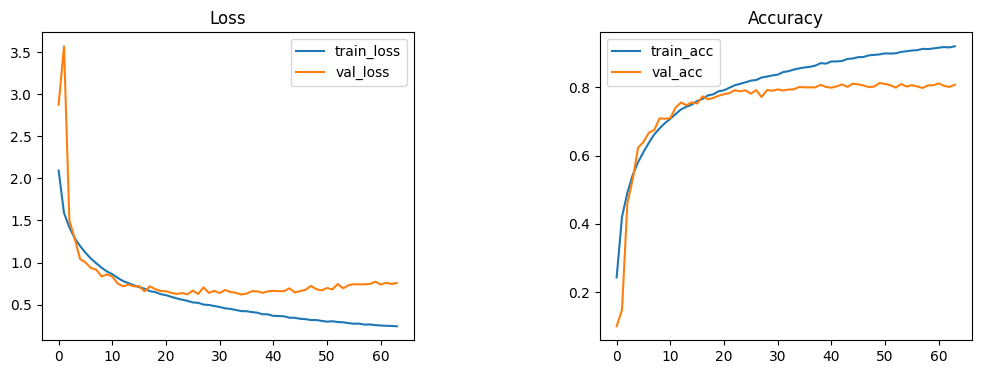

In [109]:
import matplotlib.pyplot as plt

# Lấy ra các giá trị loss và accuracy từ history object
train_loss = Score.history['loss']
val_loss = Score.history['val_loss']
train_acc = Score.history['accuracy']
val_acc = Score.history['val_accuracy']

# Vẽ biểu đồ
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(train_loss, label='train_loss')
ax[0].plot(val_loss, label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='train_acc')
ax[1].plot(val_acc, label='val_acc')
ax[1].set_title('Accuracy')
ax[1].legend()

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.5)

plt.show()
